In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
train_dir = '/content/drive/MyDrive/train'
test_dir = '/content/drive/MyDrive/test'

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/train/pizza')))
print(len(os.listdir('/content/drive/MyDrive/train/icecream')))
print(len(os.listdir('/content/drive/MyDrive/test/pizza')))
print(len(os.listdir('/content/drive/MyDrive/test/icecream')))

327
391
47
59


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)
# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 575 images belonging to 2 classes.
Found 143 images belonging to 2 classes.


In [6]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

In [7]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [8]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [9]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
18/18 [==============================] - 227s 12s/step - loss: 3.2191 - accuracy: 0.5391 - val_loss: 1.0654 - val_accuracy: 0.5315
Epoch 2/3
18/18 [==============================] - 198s 11s/step - loss: 0.7379 - accuracy: 0.6939 - val_loss: 0.5970 - val_accuracy: 0.6993
Epoch 3/3
18/18 [==============================] - 198s 11s/step - loss: 0.5365 - accuracy: 0.7548 - val_loss: 0.5325 - val_accuracy: 0.7063


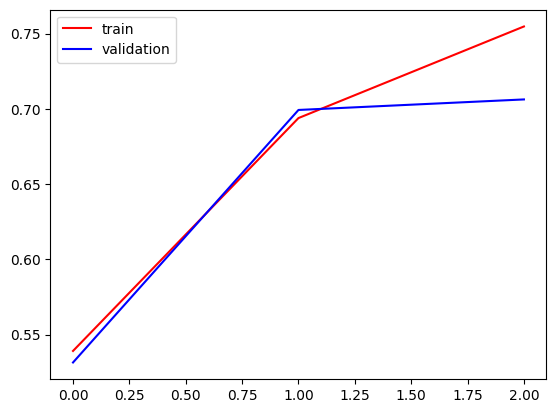

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

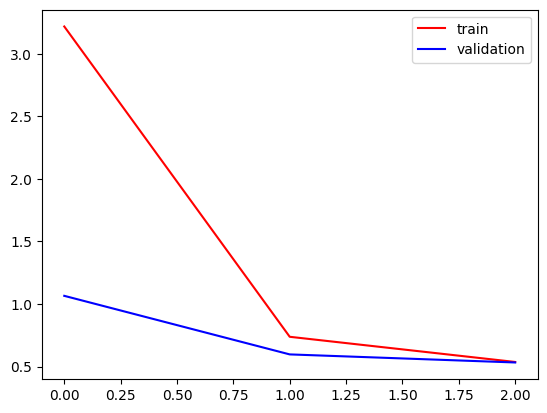

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 106 images belonging to 2 classes.


In [13]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

4/4 [==============================] - 30s 7s/step
[[0.39062053]
 [0.17007242]
 [0.6691607 ]
 [0.66256464]
 [0.12862824]
 [0.9956953 ]
 [0.8790091 ]
 [0.10324378]
 [0.78782237]
 [0.71415955]
 [0.9831113 ]
 [0.1462732 ]
 [0.9748001 ]
 [0.7397282 ]
 [0.5555392 ]
 [0.23844546]
 [0.07172358]
 [0.44187665]
 [0.27918237]
 [0.983101  ]
 [0.10128106]
 [0.8624664 ]
 [0.38650808]
 [0.7389349 ]
 [0.33906102]
 [0.17993787]
 [0.13839372]
 [0.28322452]
 [0.73777366]
 [0.9077301 ]
 [0.31257218]
 [0.67231625]
 [0.8068503 ]
 [0.733872  ]
 [0.50401074]
 [0.06485504]
 [0.08414119]
 [0.29753655]
 [0.69628686]
 [0.7944996 ]
 [0.2051356 ]
 [0.17639554]
 [0.9285306 ]
 [0.9711358 ]
 [0.11686563]
 [0.11751584]
 [0.12294323]
 [0.2593052 ]
 [0.86219925]
 [0.18183939]
 [0.46994486]
 [0.3658364 ]
 [0.99769735]
 [0.45935747]
 [0.9276766 ]
 [0.27079454]
 [0.9750697 ]
 [0.9692969 ]
 [0.5555096 ]
 [0.6255496 ]
 [0.17498311]
 [0.9050502 ]
 [0.8927662 ]
 [0.1879273 ]
 [0.5228052 ]
 [0.2041698 ]
 [0.2597018 ]
 [0.9747157

In [14]:
len(predictions)

106

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[30 29]
 [21 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.51      0.55        59
           1       0.47      0.55      0.51        47

    accuracy                           0.53       106
   macro avg       0.53      0.53      0.53       106
weighted avg       0.54      0.53      0.53       106

